In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Загрузка данных из файлов с удалением лишних столбцов
df = pd.read_excel('flats.xlsx', usecols=lambda column: column not in ['Unnamed: 56'])
euro_df = pd.read_excel('euro_renovation.xlsx', usecols=lambda column: column not in ['Unnamed: 56'])

# Переименование колонок для удобства
df.rename(columns={'7**area:** Площадь объекта.': 'area', '**price_sq:** Цена за квадратный метр.': 'price_sq'}, inplace=True)
euro_df.rename(columns={'**area:** Площадь объекта.': 'area', '**price_sq:** Цена за квадратный метр.': 'price_sq'}, inplace=True)

# Преобразование данных в числовой формат
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['price_sq'] = pd.to_numeric(df['price_sq'], errors='coerce')
euro_df['area'] = pd.to_numeric(euro_df['area'], errors='coerce')
euro_df['price_sq'] = pd.to_numeric(euro_df['price_sq'], errors='coerce')

# Очистка данных от NaN значений
df.dropna(subset=['area', 'price_sq'], inplace=True)
euro_df.dropna(subset=['area', 'price_sq'], inplace=True)

# Удаление строк, где тип ремонта не указан
if '**renovation:** Тип ремонта.' in df.columns:
    df.dropna(subset=['**renovation:** Тип ремонта.'], inplace=True)
if '**renovation:** Тип ремонта.' in euro_df.columns:
    euro_df.dropna(subset=['**renovation:** Тип ремонта.'], inplace=True)

# Добавление признака 'euro' для указания наличия евроремонта
df['euro'] = 0
euro_df['euro'] = 1

# Объединение данных в один DataFrame
data = pd.concat([df, euro_df], ignore_index=True)

# Преобразование столбца 'repair_type' в категориальный тип данных
data['**renovation:** Тип ремонта.'] = data['**renovation:** Тип ремонта.'].astype('category')

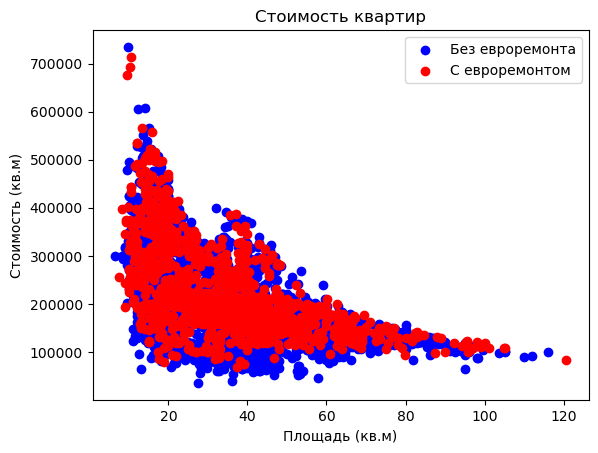

In [3]:
# Визуализация данных
%matplotlib inline
plt.scatter(df['area'], df['price_sq'], color='blue', label='Без евроремонта')
plt.scatter(euro_df['area'], euro_df['price_sq'], color='red', label='С евроремонтом')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Стоимость (кв.м)')
plt.title('Стоимость квартир')
plt.legend()
plt.show()

In [4]:
# Разделение данных на обучающую и тестовую выборки
X = data[['area', 'euro', '**renovation:** Тип ремонта.']]
X = pd.get_dummies(X, columns=['**renovation:** Тип ремонта.'], drop_first=True)  # One-hot encoding для категориального признака 'repair_type'
y = data['price_sq']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Создание и обучение модели
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [6]:
# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

# Сохранение результатов в новый файл
data['predicted_price'] = model.predict(X)
data.to_excel("flats.xlsx", index=False)

MSE: 6321635545.630056, MAE: 57933.787262711594, R2: 0.1482856330160105


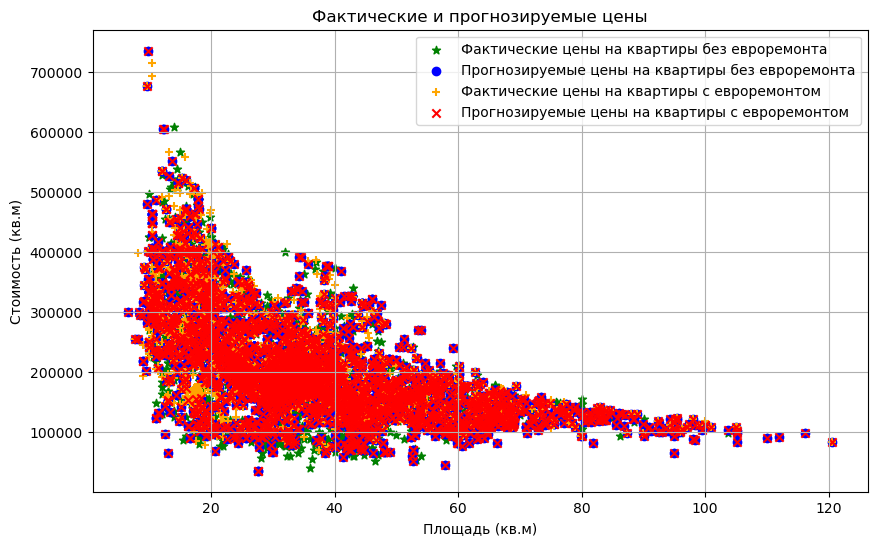

In [7]:
# Визуализация прогнозируемых и фактических данных
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price_sq'], color='green', marker='*', label='Фактические цены на квартиры без евроремонта')
plt.scatter(data['area'], data['predicted_price'], color='blue', marker='o', label='Прогнозируемые цены на квартиры без евроремонта')
plt.scatter(euro_df['area'], euro_df['price_sq'], color='orange', marker='+', label='Фактические цены на квартиры с евроремонтом')
plt.scatter(data['area'], data['predicted_price'], color='red', marker='x', label='Прогнозируемые цены на квартиры с евроремонтом')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Стоимость (кв.м)')
plt.title('Фактические и прогнозируемые цены')
plt.legend()
plt.grid()
plt.show()